In [1]:
import pandas as pd
data=pd.read_excel('指数移动平均线.xlsx')
data=data[(data['date']>=20210201) & (data['date']<=20210528)]
data=data.iloc[:,:5]

In [2]:
import numpy as np
average=np.mean(data['指数'].tolist())
std=np.std(data['指数'].tolist())
print(average,std)

256.42811211875124 10.20362198524024


In [3]:
data['指数']=data['指数']-[average for i in range(data.shape[0])]
data['指数']=data['指数']/[std for i in range(data.shape[0])]
indicator=data['指数'].tolist()
x_train = []
y_train = []
for i in range(8,data.shape[0]):
    x_train.append(data.iloc[i - 8:i, 1])
    y_train.append(data.iloc[i, 1])
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], 8, 1))

In [4]:
import tensorflow as tf
from tensorflow.python.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RNN
tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
model = tf.keras.Sequential([
    SimpleRNN(8, return_sequences=True,activation='relu'),
    Dense(33,activation='tanh'),
    Dropout(0.2),
    SimpleRNN(100,activation='elu'),
    Dense(22),
    Dropout(0.2),
    Dense(1,)
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

In [5]:
with tf.device('/gpu:0'):
    history = model.fit(x_train, y_train, batch_size=64, epochs=100)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [6]:
model.summary()

file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8, 8)              80        
_________________________________________________________________
dense (Dense)                (None, 8, 33)             297       
_________________________________________________________________
dropout (Dropout)            (None, 8, 33)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13400     
_________________________________________________________________
dense_1 (Dense)              (None, 22)                2222      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [7]:
x_predict = []
y_true = []
for i in range(data.shape[0]-17,data.shape[0]):
    x_predict.append(data.iloc[i - 8:i, 1])
    y_true.append(data.iloc[i, 1])
import numpy as np
x_predict, y_true = np.array(x_predict), np.array(y_true)
x_predict = np.reshape(x_predict, (x_predict.shape[0], 8, 1))

In [8]:
result=model.predict(x_predict, batch_size=64, verbose=0)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [9]:
print(len(indicator))

75


In [10]:
for i in range(90):
    temp_train=np.array(indicator[len(indicator)-8:len(indicator)])
    temp_train=np.reshape(temp_train,(1,8,1))
    temp_y=model.predict(temp_train, batch_size=64, verbose=0)
    indicator.append(temp_y[0][0])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

In [11]:
len(indicator)

165

In [12]:
data=pd.read_excel('指数移动平均线.xlsx')
data=data[(data['date']>=20210201) & (data['date']<=20210528)]
data=data.iloc[:,:5]
y_true = []
for i in range(data.shape[0]-17,data.shape[0]):
    y_true.append(data.iloc[i, 1])
import numpy as np
y_true =np.array(y_true)
y_true

array([263.85196662, 265.44965441, 260.83597808, 263.32086545,
       263.41793474, 262.83741809, 258.41463412, 262.2817454 ,
       267.56584421, 267.91124523, 273.5250004 , 269.18265163,
       269.82859945, 265.77223843, 267.5752147 , 266.82138208,
       266.35661654])

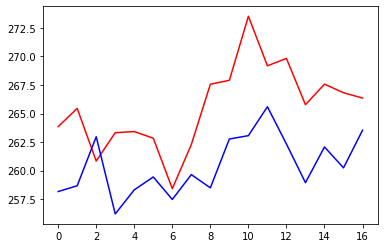

In [13]:
result=np.array(result)*std
result=result+average
import matplotlib.pyplot as plt
plt.plot(y_true,'r-')
plt.plot(result,'b-')

In [15]:
rnn_indicate=indicator[len(indicator)-90:]
rnn_indicate=np.array(rnn_indicate)*std
rnn_indicate=rnn_indicate+average
rnn_result=pd.DataFrame({
    '指数':rnn_indicate
})
rnn_result.to_csv('RNN预测结果.csv',index=False)